In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

In [2]:
#Image Augmentation for training set
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    #featurewise_center=True,
    rotation_range = 30,
    vertical_flip = True, 
    zoom_range = 0.2,
#     zca_whitening = True, 
#     zca_epsilon = 1e-6,
    width_shift_range = 0.2,
    fill_mode = 'wrap',
)
training_set = train_datagen.flow_from_directory(
    'Dataset/Train',
    target_size = (100, 100),
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True
)

Found 601 images belonging to 3 classes.


In [3]:
#No Image Augmentation for Validation set
validation_datagen = ImageDataGenerator(
    rescale = 1./255
)
validation_set = validation_datagen.flow_from_directory(
    'Dataset/Validation',
    target_size = (100, 100),
    color_mode = 'grayscale',
    batch_size = 16,
    class_mode = 'categorical'
)

Found 133 images belonging to 3 classes.


In [4]:
#Initializing the neural network
cnn = tf.keras.models.Sequential()

In [5]:
#Convolutional layer 1
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = tf.keras.layers.LeakyReLU(alpha = 0.2), input_shape = [100, 100, 1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (3, 3), strides = 2))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.BatchNormalization())

In [6]:
#Convolutional layer 2
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = tf.keras.layers.LeakyReLU(alpha = 0.1)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2))
cnn.add(tf.keras.layers.Dropout(0.5))
#0.5
cnn.add(tf.keras.layers.BatchNormalization())

In [7]:
#Convolutional layer 3
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = tf.keras.layers.LeakyReLU(alpha = 0.2)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2))
cnn.add(tf.keras.layers.Dropout(0.4))
#0.4
cnn.add(tf.keras.layers.BatchNormalization())

In [8]:
#Flattening the inputs before feeding it into the fully connected layer
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dropout(0.5))
#0.5
cnn.add(tf.keras.layers.BatchNormalization())

In [9]:
#Fully connected layers
cnn.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))
#0.3
cnn.add(tf.keras.layers.BatchNormalization())

In [10]:
#Fully connected layers
# cnn.add(tf.keras.layers.Dense(units = 128, kernel_regularizer = regularizers.l1(0.1) , activation = 'relu'))
# cnn.add(tf.keras.layers.Dropout(0.2))
# cnn.add(tf.keras.layers.BatchNormalization())

In [11]:
#Fully connected layers
cnn.add(tf.keras.layers.Dense(units = 128, kernel_regularizer = regularizers.l2(0.09), activation = 'relu'))
#64
#0.07
cnn.add(tf.keras.layers.Dropout(0.6))
#0.2
cnn.add(tf.keras.layers.BatchNormalization())

In [12]:
#Output layer
cnn.add(tf.keras.layers.Dense(units = 3, activation = 'softmax'))

In [13]:
#Summary of model architecture
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0

In [14]:
#Compiling the model
cnn.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
#Training the model
history = cnn.fit(x = training_set, validation_data = validation_set, epochs = 25)

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/25
19/19 [==============================] - 20s 743ms/step - loss: 5.8035 - accuracy: 0.5607 - val_loss: 3.9476 - val_accuracy: 0.3684
Epoch 2/25
19/19 [==============================] - 11s 556ms/step - loss: 2.0757 - accuracy: 0.6722 - val_loss: 2.5106 - val_accuracy: 0.3308
Epoch 3/25
19/19 [==============================] - 11s 558ms/step - loss: 1.0806 - accuracy: 0.7321 - val_loss: 2.0523 - val_accuracy: 0.3308
Epoch 4/25
19/19 [==============================] - 11s 552ms/step - loss: 0.8354 - accuracy: 0.7970 - val_loss: 1.8500 - val_accuracy: 0.3459
Epoch 5/25
19/19 [==============================] - 11s 570ms/step - loss: 0.7355 - accuracy: 0.7820 - val_loss: 1.9666 - val_accuracy: 0.3459
Epoch 6/25
19/19 [==============================] - 12s 642ms/step - loss: 0.5721 - accuracy: 0.8586 - val_loss: 2.3325 - val_accuracy: 0.3459
Epoch 7/25
19/19 [==============================] - 11s 575ms/step - loss: 0.5090 - accuracy: 0.9168 - val_loss: 2.6337 - val_accuracy: 0.3459

5/5 - 1s - loss: 4.8826 - accuracy: 0.3534 - 1s/epoch - 243ms/step


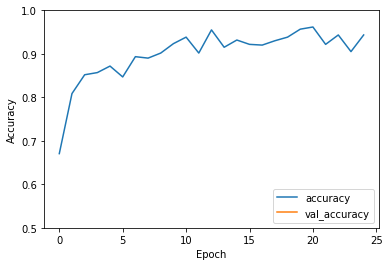

In [17]:
#Plot for keeping check of accuracy with number of epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(validation_set, verbose=2)

In [ ]:
#loss, acc = cnn.evaluate(validation_datagen.flow(X_test, y_test))

print(f'Loss: {loss}\nAccuracy: {acc*100}')

In [18]:
#Saving the model
cnn.save('CNN2_Model.h5')

In [71]:
#from keras.utils import image
test_image = tf.keras.utils.load_img('Dataset/Validation/Sanika Gadkari/4_face_1.jpg', target_size = (100, 100))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

1/1 [==============================] - 0s 33ms/step


{'Ankit Dighe': 0, 'Neha Adhikari': 1, 'Sanika Gadkari': 2}

In [72]:
if result[0][0]==0:
    prediction = 'Ankit'
elif result[0][0]==1:
    prediction = 'Neha'
else:
    prediction = 'Sanika'

print(prediction)

Code for Grid Search to check good params

In [57]:
def create_cnn_model(filters, kernel_size, pool_size, dense_units, dropout_rate, regularizer_rate):
    cnn = tf.keras.models.Sequential()
    cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = tf.keras.layers.LeakyReLU(alpha = 0.2), input_shape = [100, 100, 3]))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = (3, 3), strides = 2))
    cnn.add(tf.keras.layers.Dropout(0.5))
    cnn.add(tf.keras.layers.BatchNormalization())
    #Convolutional layer 2
    cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = tf.keras.layers.LeakyReLU(alpha = 0.1)))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2))
    cnn.add(tf.keras.layers.Dropout(0.5))
    #0.5
    cnn.add(tf.keras.layers.BatchNormalization())
    #Convolutional layer 3
    cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = tf.keras.layers.LeakyReLU(alpha = 0.2)))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2))
    cnn.add(tf.keras.layers.Dropout(0.4))
    #0.4
    cnn.add(tf.keras.layers.BatchNormalization())
    #Flattening the inputs before feeding it into the fully connected layer
    cnn.add(tf.keras.layers.Flatten())
    cnn.add(tf.keras.layers.Dropout(0.5))
    #0.5
    cnn.add(tf.keras.layers.BatchNormalization())
    #Fully connected layers
    cnn.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
    cnn.add(tf.keras.layers.Dropout(0.3))
    #0.3
    cnn.add(tf.keras.layers.BatchNormalization())
    cnn.add(tf.keras.layers.Dense(units = 3, activation = 'softmax'))
    
    return cnn

In [58]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

param_grid = {
    'filters': [32, 64],
    'kernel_size': [(3, 3), (5, 5)],
    'pool_size': [(2, 2), (3, 3)],
    'dense_units': [64, 128, 256],
    'dropout_rate': [0.3, 0.3, 0.4, 0.5, 0.7],
    'regularizer_rate': [0.03, 0.05, 0.07, 0.09, 1]
}

In [ ]:
# Wrap the Keras model as a scikit-learn classifier
cnn_classifier = KerasClassifier(build_fn=create_cnn_model, epochs=10, batch_size=32, verbose=0)

# Create a GridSearchCV instance
grid = GridSearchCV(estimator=cnn_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform the grid search
grid_result = grid.fit(training_set, steps_per_epoch = len(training_set))

C:\Users\dell\AppData\Local\Temp\ipykernel_15792\3278056396.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cnn_classifier = KerasClassifier(build_fn=create_cnn_model, epochs=10, batch_size=32, verbose=0)
C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [ ]:
print("Best parameters found: ", grid_result.best_params_)
print("Best accuracy found: ", grid_result.best_score_)

In [ ]:
best_model = create_cnn_model(**grid_result.best_params_)
best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))